In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras.models
from keras.models import Sequential

/Users/vivek/opt/anaconda3/envs/mingqian/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/vivek/opt/anaconda3/envs/mingqian/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/vivek/opt/anaconda3/envs/mingqian/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/vivek/opt/anaconda3/e

In [3]:
#load data
loadname='./data_for_ML/WSS_sample 1.txt'
a1 = np.loadtxt(loadname)
loadname='./data_for_ML/WSS_sample 2.txt'
a2 = np.loadtxt(loadname)
loadname='./data_for_ML/WSS_sample 3.txt'
a3 = np.loadtxt(loadname)
loadname='./data_for_ML/WSS_sample 4.txt'
a4 = np.loadtxt(loadname)
loadname='./data_for_ML/WSS_sample 5.txt'
a5 = np.loadtxt(loadname)
loadname='./data_for_ML/WSS_sample 6.txt'
a6 = np.loadtxt(loadname)
#loadname='./data_for_ML/WSS_sample 7_non_newtonian1.txt' # since for one case we consider non-newtonian data
loadname='./data_for_ML/WSS_sample 7.txt'
a7 = np.loadtxt(loadname)

print(np.shape(a4))

(1603183, 11)


In [4]:
data = np.vstack((a1,a2,a3,a4,a5,a6,a7))
data_1 = data[:,6:9]
data_train = np.vstack((a2,a3,a4,a5,a6,a7))
data_train_1 = data_train[:,6:9]
data_test = a1
print(np.shape(data_train))
print(np.shape(data_test))

(6471157, 11)
(1043292, 11)


In [5]:
data_train_p = data_train[data_train[:,-1]==1,:]#data from pruned vessels, p=pruned
data_train_up = data_train[data_train[:,-1]==0,:]#data from unpruned vessels, up=unpruned
print(np.shape(data_train_p))
print(np.shape(data_train_up))
print(data_train_up[1000,:])

(270567, 11)
(6200590, 11)
[ 2.6300e+02  6.8700e+02  2.0000e+00  1.0809e+03  1.3601e+00  1.0000e+01
 -2.4731e-01  1.5494e+01  1.0256e+04 -1.8819e-01  0.0000e+00]


In [6]:
#data for training 0-2:coordinate data; 3-5:cylinder coordinate data; 
#6:local WSS(alphat); 7:vessel radius; 8:pressure drop; 9: scalar(not correct); 10: prune or not
x_train_p = data_train_p[:,6:9]  #x is input
x_train_up = data_train_up[:,6:9]
x_test = data_test[:,6:9]

y_train_p = data_train_p[:,10:11]  # y is output
y_train_up = data_train_up[:,10:11]
y_test = data_test[:,10:11]

#normalization
x_normal=abs(x_train_p)
x_normal=x_normal.max(axis=0)
x_train_p = x_train_p/x_normal
x_train_up = x_train_up/x_normal
x_test = x_test/x_normal

print(np.shape(x_train_p))
print(np.shape(y_train_p))
print(x_normal.max(axis=0))
print(x_train_up.max(axis=0))
print(x_train_up.min(axis=0))
print(x_train_p.max(axis=0))
print(x_train_p.min(axis=0))
print(x_test.max(axis=0))
print(x_test.min(axis=0))

(270567, 3)
(270567, 1)
20382.0
[0.61808468 1.15591058 1.13433422]
[-2.5030357   0.16406289  0.        ]
[0.56266494 1.         1.        ]
[-1.          0.16406289  0.08317143]
[0.51543755 0.92428644 1.34986753]
[-1.1441755   0.16406289  0.02778432]


In [7]:
index = 4000

print(x_train_up[index,:])
print(y_train_up[index,:])

[-0.28602769  0.73010861  0.5060838 ]
[0.]


In [8]:
print(y_test.max(axis=0))

[1.]


In [9]:
rand_arr = np.arange(x_train_up.shape[0])
 
np.random.shuffle(rand_arr)
print(x_train_up[rand_arr[0:5]])
print(y_train_up[rand_arr[0:5]])
print(data_train_up[rand_arr[0:5]])
print(y_train_p.max(axis=0))

[[ 0.07699101  0.34670371  0.43433422]
 [-0.37322918  0.50289846  0.7921205 ]
 [-0.25414879  0.56548371  0.45841919]
 [ 0.02557678  0.4878631   0.51064665]
 [-0.42878653  0.47702071  1.05156511]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[ 2.8400e+02  5.3700e+02  9.0000e+00  8.7949e+02  1.2856e+00  3.0000e+00
   9.5107e-02  5.4904e+00  8.8526e+03 -1.0846e-01  0.0000e+00]
 [ 3.1700e+02  3.6700e+02  1.4000e+01  6.8679e+02  1.1566e+00  2.0000e+00
  -4.6105e-01  7.9639e+00  1.6145e+04 -8.7999e-02  0.0000e+00]
 [ 3.9300e+02  2.4500e+02  1.0000e+01  6.4420e+02  9.8446e-01  2.0000e+00
  -3.1395e-01  8.9550e+00  9.3435e+03  2.3542e-02  0.0000e+00]
 [ 3.4800e+02  6.3000e+02  1.8000e+01  1.0502e+03  1.2701e+00  6.0000e+00
   3.1595e-02  7.7258e+00  1.0408e+04 -1.8470e-01  0.0000e+00]
 [ 3.1000e+02  2.0000e+00  1.2000e+01  4.0414e+02  8.4107e-01  0.0000e+00
  -5.2968e-01  7.5541e+00  2.1433e+04  3.5629e-02  0.0000e+00]]
[1.]


In [10]:
def simple_linear_model(input_dim):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=1, input_dim=input_dim, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
input_dim = 3  # input features
nn = simple_linear_model(input_dim)

In [12]:
lenth_pru=len(data_train_p)
print(lenth_pru)

270567


In [13]:
#training
loss_values=np.array([0])
vali_loss=np.array([0])
for i in range(20):
    print(i)
    rand_arr = np.arange(x_train_up.shape[0]) 
    np.random.shuffle(rand_arr)
    ran_x_train_up = x_train_up[rand_arr[0:lenth_pru]]
    ran_y_train_up = y_train_up[rand_arr[0:lenth_pru]]
    x_train = np.vstack((ran_x_train_up,x_train_p))
    y_train = np.vstack((ran_y_train_up,y_train_p))
    cost = nn.fit(x_train, y_train, epochs=10, batch_size=60000, validation_data=(x_test, y_test), verbose=1)
    loss_values = np.hstack((loss_values,cost.history['loss']))
    vali_loss = np.hstack((vali_loss,cost.history['val_loss']))

0
Train on 541134 samples, validate on 1043292 samples
Epoch 1/10
541134/541134 [==============================] - 1s 2us/step - loss: 0.6768 - acc: 0.5860 - val_loss: 0.7751 - val_acc: 0.2539
Epoch 2/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6761 - acc: 0.5884 - val_loss: 0.7803 - val_acc: 0.2419
Epoch 3/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6754 - acc: 0.5902 - val_loss: 0.7859 - val_acc: 0.2290
Epoch 4/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6748 - acc: 0.5919 - val_loss: 0.7914 - val_acc: 0.2172
Epoch 5/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6742 - acc: 0.5931 - val_loss: 0.7959 - val_acc: 0.2077
Epoch 6/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6736 - acc: 0.5941 - val_loss: 0.7981 - val_acc: 0.2027
Epoch 7/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6730 - acc: 0.5952 - val_loss: 0.80

Epoch 8/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6492 - acc: 0.6553 - val_loss: 0.8282 - val_acc: 0.1789
Epoch 9/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6488 - acc: 0.6559 - val_loss: 0.8259 - val_acc: 0.1822
Epoch 10/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6484 - acc: 0.6565 - val_loss: 0.8241 - val_acc: 0.1850
6
Train on 541134 samples, validate on 1043292 samples
Epoch 1/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6478 - acc: 0.6580 - val_loss: 0.8249 - val_acc: 0.1852
Epoch 2/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6474 - acc: 0.6590 - val_loss: 0.8270 - val_acc: 0.1839
Epoch 3/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6470 - acc: 0.6602 - val_loss: 0.8283 - val_acc: 0.1835
Epoch 4/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6466 - acc: 0.6612 - val_loss: 0.8

Epoch 5/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6302 - acc: 0.6800 - val_loss: 0.8314 - val_acc: 0.2109
Epoch 6/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6299 - acc: 0.6802 - val_loss: 0.8319 - val_acc: 0.2109
Epoch 7/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6296 - acc: 0.6804 - val_loss: 0.8315 - val_acc: 0.2117
Epoch 8/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6293 - acc: 0.6807 - val_loss: 0.8314 - val_acc: 0.2124
Epoch 9/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6291 - acc: 0.6810 - val_loss: 0.8326 - val_acc: 0.2118
Epoch 10/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6288 - acc: 0.6814 - val_loss: 0.8334 - val_acc: 0.2116
12
Train on 541134 samples, validate on 1043292 samples
Epoch 1/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6284 - acc: 0.6821 - val_loss: 0.

Epoch 2/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6162 - acc: 0.6913 - val_loss: 0.8262 - val_acc: 0.2593
Epoch 3/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6160 - acc: 0.6915 - val_loss: 0.8269 - val_acc: 0.2593
Epoch 4/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6158 - acc: 0.6915 - val_loss: 0.8265 - val_acc: 0.2602
Epoch 5/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6156 - acc: 0.6917 - val_loss: 0.8250 - val_acc: 0.2619
Epoch 6/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6154 - acc: 0.6919 - val_loss: 0.8273 - val_acc: 0.2606
Epoch 7/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6152 - acc: 0.6919 - val_loss: 0.8284 - val_acc: 0.2603
Epoch 8/10
541134/541134 [==============================] - 1s 1us/step - loss: 0.6150 - acc: 0.6922 - val_loss: 0.8260 - val_acc: 0.2629
Epoch 9/10
541134/541134 [========

In [14]:
# weights and bias
weights, bias = nn.layers[0].get_weights()

# Flatten weights to 1D array and format each element to 8 decimal places
formatted_weights = ["{:.8f}".format(w) for w in weights.flatten()]
formatted_bias = "{:.8f}".format(bias[0])

# Print weights and bias
print("Weights (coefficients):", formatted_weights)
print("Bias (intercept):", formatted_bias)

Weights (coefficients): ['0.38082656', '-2.88145518', '1.21349680']
Bias (intercept): 0.61783278


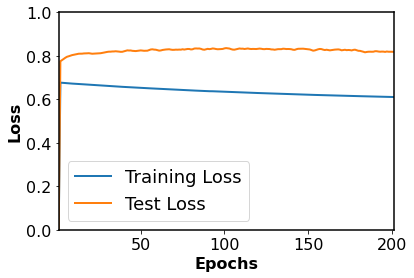

In [15]:
#plot loss function
fig,ax = plt.subplots()
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, label='Training Loss',linewidth=2.0)
plt.plot(epochs, vali_loss, label='Test Loss',linewidth=2.0)
plt.rcParams['font.size'] = 18
plt.xlabel('Epochs',fontsize=16, fontweight='bold')
plt.ylabel('Loss',fontsize=16, fontweight='bold')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
plt.xlim(1, epochs[-1])
plt.ylim(0, 1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
linewidth=10
plt.show()

In [16]:
print(loss_values[-1])
print(vali_loss[-1])

0.6106557381221971
0.8184893554191236


In [17]:
y_pred = nn.predict(x_test)
print(np.shape(y_pred))
print(y_pred.max(axis=0))
print(y_pred.min(axis=0))

(1043292, 1)
[0.83041024]
[0.23414417]


In [18]:
index = 4
print(y_pred[index])
print(y_test[index])

[0.2870875]
[0.]


In [19]:
output
np.savetxt('output_a1.txt',y_pred)